Cost after iteration 0: 0.693144
Cost after iteration 1: 0.693144
Cost after iteration 2: 0.693144
Cost after iteration 3: 0.693144
Cost after iteration 4: 0.693143
Cost after iteration 5: 0.693143
Cost after iteration 6: 0.693143
Cost after iteration 7: 0.693143
Cost after iteration 8: 0.693143
Cost after iteration 9: 0.693143
Cost after iteration 10: 0.693143
Cost after iteration 11: 0.693142
Cost after iteration 12: 0.693142
Cost after iteration 13: 0.693142
Cost after iteration 14: 0.693142
Cost after iteration 15: 0.693142
Cost after iteration 16: 0.693142
Cost after iteration 17: 0.693141
Cost after iteration 18: 0.693141
Cost after iteration 19: 0.693141
Cost after iteration 20: 0.693141
Cost after iteration 21: 0.693141
Cost after iteration 22: 0.693141
Cost after iteration 23: 0.693141
Cost after iteration 24: 0.693140
Cost after iteration 25: 0.693140
Cost after iteration 26: 0.693140
Cost after iteration 27: 0.693140
Cost after iteration 28: 0.693140
Cost after iteration 29:

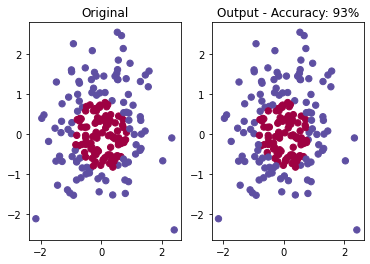

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled64.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SWQpdqBixBGLo3iTtwlqYkV_XVwabRp4
"""

# https://towardsdatascience.com/neural-net-from-scratch-using-numpy-71a31f6e3675
# A simple neural network solver using numpy

from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np


def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    outcome = sigmoid(x)
    return outcome * (1 - outcome)

def load_extra_datasets():  
    N = 200
    gaussian_quantiles = datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2,  shuffle=True, random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])

# X and Y are the input and output variables
m = X.shape[1]
n_x = X.shape[0] # size of input layer`
n_h1 = 4
n_y = Y.shape[0] # size of output layer
n_h0 = 3

# Initialize the model’s parameters
W0 = np.random.randn(n_h0,n_x) * 0.05
b0 = np.zeros(shape=(n_h0, 1))
W1 = np.random.randn(n_h1,n_h0) * 0.05
b1 = np.zeros(shape=(n_h1, 1))
W2 = np.random.randn(n_y,n_h1) * 0.05
b2 = np.zeros(shape=(n_y, 1))



num_iterations = 3000
learning_rate = 3

for i in range(0,num_iterations):




    # Implement Forward Propagation to calculate A2 (probabilities)
    # Sigmoid derivative with W0 and b0 layers 
    Z0 = np.dot(W0,X) + b0
    A0 = sigmoid(Z0)
    Z1 = np.dot(W1,A0) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = 1/(1 + np.exp(-Z2)) # Final output prediction

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    print("Cost after iteration %i: %f" %(i, cost))

    # BackPropagation/Gradient Descent
    # dZ2 = d(cost)/dZ2  = d(cost)/dA2  * d(A2)/dZ2 
    dZ2 = A2 - Y # https://stats.stackexchange.com/questions/370723/how-to-calculate-the-derivative-of-crossentropy-error-function 
    dW2 = (1 / m) * np.dot(dZ2, A1.T)   # d(cost)/dW2 = d(cost)/dZ2 * d(Z2)/dW2 (for each example)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/dW2 = d(cost)/dZ2 * d(Z2)/db2 (for each example)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) 
    # d(cost)/dZ1 = d(cost)/dZ2 * d(Z2)/dA1 * d(A1)/dZ1 
    # https://socratic.org/questions/what-is-the-derivative-of-tanh-x
    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    # Sigmoid derivative with W0 and b0 layers 
    dZ0 = np.multiply(np.dot(W1.T, dZ1), np.multiply(A0,(1- A0)))
    dW0 = (1 / m) * np.dot(dZ0, X.T)
    db0 = (1 / m) * np.sum(dZ0, axis=1, keepdims=True)


    # Update the parameters
    # Added the W0 and b0 layers
    W0 = W0 - learning_rate * dW0
    b0 = b0 - learning_rate * db0
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2


# use parameters to estimate final output
Z0 = np.dot(W0,X) + b0
A0 = sigmoid(Z0)
Z1 = np.dot(W1,A0) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = 1/(1 + np.exp(-Z2)) # Final output prediction

accuracy = float((np.dot(Y, A2.T) + np.dot(1-Y, 1-A2.T))/float(Y.size)*100)
print('Accuracy: %d' %accuracy+'%')

# now plot the predictions
Y_hat = A2 > 0.5

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral)
ax1.set_title('Original')
ax2.scatter(X[0, :], X[1, :], c=Y_hat[0,:], s=40, cmap=plt.cm.Spectral)
ax2.set_title('Output - Accuracy: %d' %accuracy+'%')
plt.show()

